# Random forest using P-Arts Dataset
Ajay James, Manjusha J, Chandran Saravanan, "Malayalam Handwritten Character Recognition Using AlexNet Based Architecture", *Indonesian Journal of Electrical Engineering and Informatics (IJEEI)*,2018
ISSN 2089-3272, [DOI: 11591/ijeei.v6i4.518.](https://doi.org/10.11591/ijeei.v6i4.518)

## Import the packages

In [ ]:
from google.colab import drive
import os
import pickle

#Image Processing
import cv2
from skimage.filters import sobel_v,sobel_h,sobel

import matplotlib.pyplot as plt
import numpy as np

# Sklearn 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Extract files to the Runtime

In [ ]:
!rm -rf './dataset'
!sh -c "mkdir dataset && cd dataset && unrar x /content/drive/MyDrive/dataset/P-ARTS\ KAYYEZHUTHU\ MALAYALAM\ HANDWRITTEN\ DATASET/P-ARTS\ KAYYEZHUTHU\ MALAYALAM\ HANDWRITTEN\ DATASET.rar"

## Import the data

In [ ]:
base_dir = './dataset'
image_per_class = 3500
img_width = 32
img_height = 32

In [ ]:
images = []
labels = []

for directory, sub_dir,filenames in os.walk(base_dir):
    if sub_dir != []:
        class_names = sub_dir
        continue
    i=0
    for file in filenames:
        if  i < image_per_class and (file.endswith('.jpg') or file.endswith('.JPG')):

            img = cv2.imread(os.path.join(directory,file),cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(img_width,img_height),interpolation=cv2.INTER_LANCZOS4)

            feature_vector = np.float32(img.flatten())
            images.append(feature_vector)

            labels.append(directory.split('/')[-1][4:])
            i+=1
    print(f"Recived {i} images from{directory}")

images = np.array(images,dtype=np.float32)
labels = np.array(labels,dtype=np.uint8)

class_names = [ int(x[4:]) for x in class_names ]
class_names.sort()


Recived 2090 images from./dataset/CHAR15
Recived 2128 images from./dataset/CHAR36
Recived 2128 images from./dataset/CHAR4
Recived 2090 images from./dataset/CHAR31
Recived 1995 images from./dataset/CHAR12
Recived 2128 images from./dataset/CHAR27
Recived 2128 images from./dataset/CHAR21
Recived 2071 images from./dataset/CHAR20
Recived 2128 images from./dataset/CHAR24
Recived 2108 images from./dataset/CHAR41
Recived 2090 images from./dataset/CHAR26
Recived 2128 images from./dataset/CHAR11
Recived 2014 images from./dataset/CHAR37
Recived 2090 images from./dataset/CHAR38
Recived 2090 images from./dataset/CHAR29
Recived 2128 images from./dataset/CHAR34
Recived 2109 images from./dataset/CHAR9
Recived 1976 images from./dataset/CHAR42
Recived 2128 images from./dataset/CHAR43
Recived 2090 images from./dataset/CHAR28
Recived 2109 images from./dataset/CHAR14
Recived 2109 images from./dataset/CHAR18
Recived 2128 images from./dataset/CHAR10
Recived 2128 images from./dataset/CHAR16
Recived 2090 image

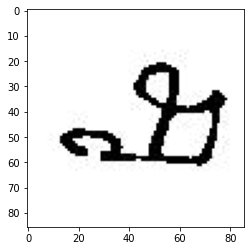

In [ ]:
img = cv2.imread('./dataset/CHAR39/MD1000.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img,'gray')

In [ ]:
len(class_names)
print(len(np.unique(labels)))
print(labels)

44
[15 15 15 ...  6  6  6]


In [ ]:
num_classes = len(class_names)
print(num_classes)
assert num_classes== len(np.unique(labels))
print(f"Images Per Class = {np.floor(images.shape[0]/num_classes)}")

44
Images Per Class = 2088.0


### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,random_state = 75)

## Random Forest

In [ ]:
print(f''' Dimensions
X Train :- {x_train.shape}
Y Train :- {y_train.shape}
X Test  :- {x_test.shape}
Y Test  :- {y_test.shape}
''')

 Dimensions
X Train :- (73521, 1024)
Y Train :- (73521,)
X Test  :- (18381, 1024)
Y Test  :- (18381,)



In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

model_name = 'random_forest_3_PArts'
pickle.dump(model,open(str('/content/drive/MyDrive/models/'+model_name+'.pkl'),'wb'))

In [ ]:
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       435
           2       0.96      0.98      0.97       413
           3       0.98      0.99      0.99       421
           4       0.98      0.97      0.98       446
           5       0.99      0.98      0.99       453
           6       0.93      0.94      0.93       409
           7       0.92      0.95      0.93       417
           8       0.97      0.97      0.97       389
           9       0.98      0.97      0.98       418
          10       0.96      0.95      0.96       402
          11       0.98      0.97      0.98       418
          12       0.98      0.93      0.95       430
          13       0.96      0.94      0.95       420
          14       0.95      0.91      0.93       459
          15       0.94      0.93      0.94       405
          16       0.96      0.98      0.97       458
          17       0.96      0.97      0.97       397
          18       0.93    

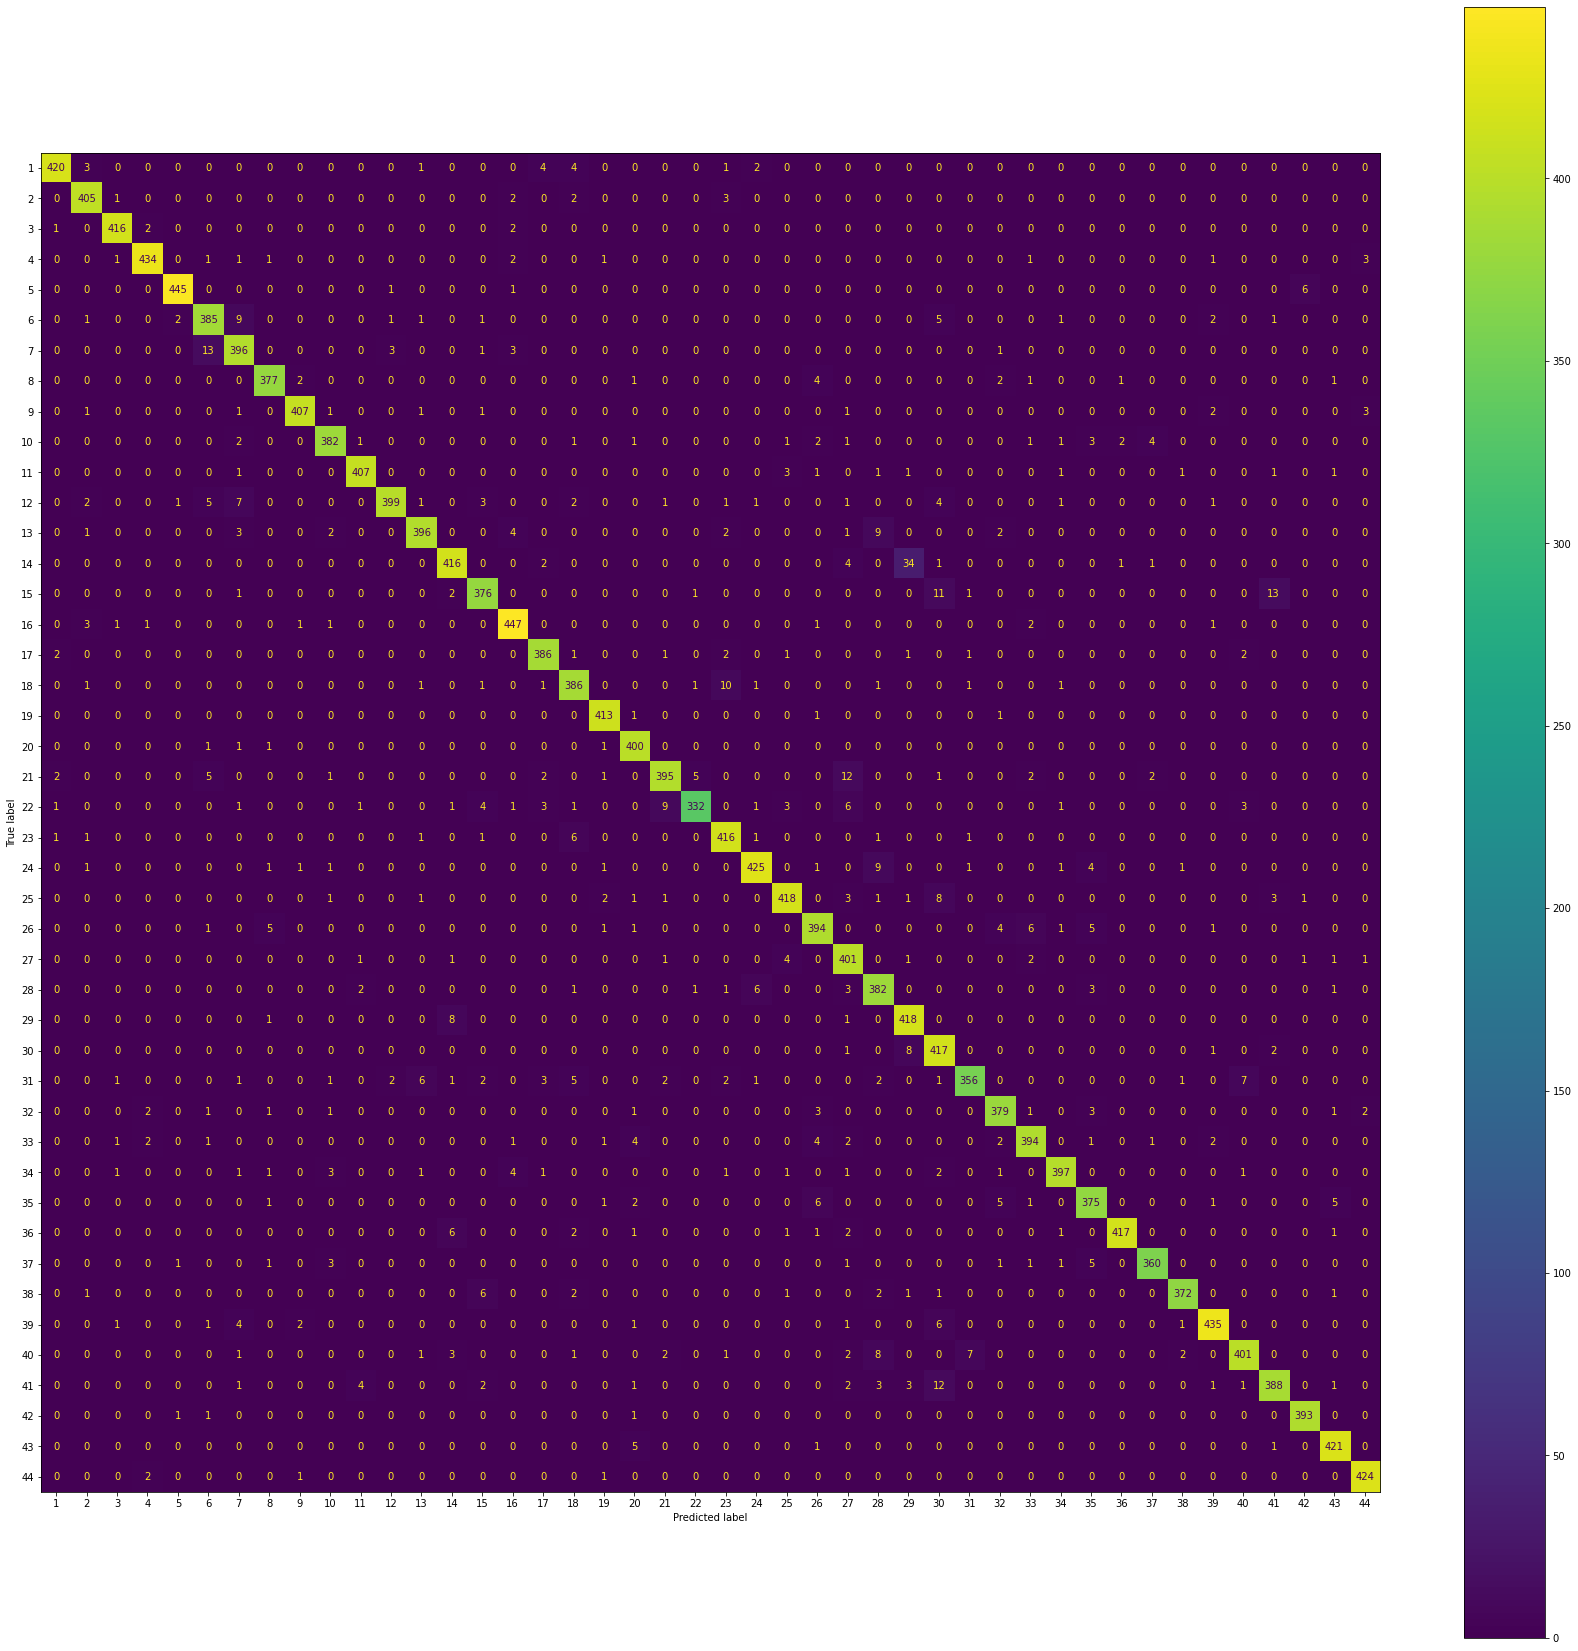

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_confusion_matrix(model,x_test, y_test,ax=ax,values_format='d')
plt.show()

In [ ]:
cv = cross_val_score(model, x_train,y_train, cv=10, n_jobs = -1,scoring = 'accuracy')
print(f"Cross Validation Accuracy: {np.average(cv)*100:.2f}")

Cross Validation Accuracy: 94.99


## Load the Saved Model

In [ ]:
model_name = 'random_forest_3_PArts'
model = pickle.load(open('/content/drive/MyDrive/models/'+model_name+'.pkl','rb'))

In [ ]:
# mal_dict contains the mapping to the character in the folder
#@title
mal_dict = {
    1 : ("05",),
    2 : ("06",),
    3 : ("07",),
    4 : ("09",),
    5 : ("0b",),
    6 : ("0e",),
    7 : ("0f",),
    8 : ("12",),
    9 : ("15",),
    10: ("16",),
    11: ("17",),
    12: ("18",),
    13: ("19",),
    14: ("1a",),
    15: ("1b",),
    16: ("1c",),
    17: ("1d",),
    18: ("1e",),
    19: ("1f",),
    20: ("20",),
    21: ("21",),
    22: ("22",),
    23: ("23",),
    24: ("24",),
    25: ("25",),
    26: ("26",),
    27: ("27",),
    28: ("28",),
    29: ("2a",),
    30: ("2b",),
    31: ("2c",),
    32: ("2d",),
    33: ("2e",),
    34: ("2f",),
    35: ("30",),
    36: ("32",),
    37: ("35",),
    38: ("36",),
    39: ("37",),
    40: ("38",),
    41: ("39",),
    44: ("33",),
    42: ("34",),
    43: ("31",),
}

def get_dict(mal_dict):
    prefix = "0x0d"
    mal_char_dict = {}
    for x in mal_dict.keys():
        char_tuple = mal_dict[x]
        char = [prefix + a for a in char_tuple]
        chr_str = ''.join([chr(int(a,16)) for a in char])   
        #print(f"{x:03} : {chr_str:6}{str(char)}")
        
        mal_char_dict[x] = chr_str
    return mal_char_dict

mal_dict = get_dict(mal_dict)

In [ ]:
import random

In [ ]:
def get_image(image_set,label_set):
    pos = random.randint(0,image_set.shape[0])
    img = image_set[pos]
    label = label_set[pos]

    return (img,label)

The label is: 16


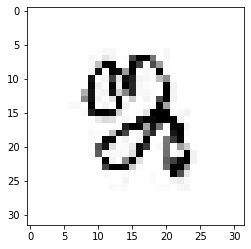

In [ ]:
image,label = get_image(images,labels)
print(f"The label is: {label}")
plt.imshow(np.reshape(image,(img_width,img_height)),'gray')

In [ ]:
y = model.predict(image.reshape(1,-1))[0]

In [ ]:
# mal_dict contains the mapping to the character in the folder
if y == label:
    print(f"Correctly Predicted: {mal_dict[y]}")
else:
    print(f"Model thinks {mal_dict[label]} is {mal_dict[y]}")

Correctly Predicted: ജ
